In this notebook we will see a simple implementation of gradient descent and how adjusting the learn rate affects the model.

In [1]:
### In this cell, we import the necessary packages.

import matplotlib.pyplot as plt
import numpy as np
import copy

%matplotlib inline

In [2]:
### Generate the data that we want to fit.

x_data = np.linspace(0, 5, 20)
y_data = x_data**3 + 50*np.random.rand(20)

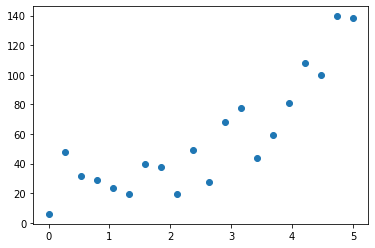

In [3]:
### Create a scatter plot of the data.

plt.scatter(x_data, y_data)
plt.show()

In [4]:
### Our model that we use will be a polynomial fit. Let's take the degree to be 3.
### This means we will need 4 weights in the model, i.e. y = w0 + w1*x + w2*x^2 + w3*x^3.
### Let's initialize them with random values to begin with, but we'll keep a copy of the original weights to use again later.

initial_weights = np.random.rand(4)

In [5]:
### The squared-error from the i^th data point is given by E(w0, w1, w2, w3, i)^2 where
### E(w0, w1, w2, w3, i) = w0 + w1*x_data[i] + w2*x_data[i]^2 + w3*x_data[i]^3 - y_data[i]
### The derivative with respect to w0 is 2*E(w0, w1, w2, w3, i)
### The derivative with respect to w1 is 2*E(w0, w1, w2, w3, i)*x_data[i]
### The derivative with respect to w2 is 2*E(w0, w1, w2, w3, i)*x_data[i]^2
### The derivative with respect to w3 is 2*E(w0, w1, w2, w3, i)*x_data[i]^3
### Thus, the gradient is 2*E(w0, w1, w2, w3, i)*(1, x_data[i], x_data[i]^2, x_data[i]^3)

In [6]:
### Let's make functions to compute E(w0, w1, w2, w3, i) and the gradient.

def ComputeError(w, x_i, y_i):
    return (w[0] + w[1]*x_i + w[2]*x_i**2 + w[3]*x_i**3 - y_i)**2

def ComputeGradient(w, x_i, y_i):
    return 2*(w[0] + w[1]*x_i + w[2]*x_i**2 + w[3]*x_i**3 - y_i)*np.array([1, x_i, x_i**2, x_i**3])

Gradient descent works by travelling a small amount backwards along the gradient.
The size of the small amount is called the learning rate.

In [7]:
### Let's train the entries of w for 100 steps with a learning rate of 0.001.
### For the sake of visuals, let's store the error over time

weights = copy.deepcopy(initial_weights)

all_steps = []
all_errors = []
lr = 0.001
for step in range(100):
    # Compute the error
    error = sum([ComputeError(weights, x_data[i], y_data[i]) for i in range(len(x_data))])
    
    # Store the values
    all_steps.append(step)
    all_errors.append(error)
    
    # Compute the combined gradient
    gradient = sum([ComputeGradient(weights, x_data[i], y_data[i]) for i in range(len(x_data))])
    
    # Normalize the gradient to be the size of the learn rate
    gradient *= lr/np.sqrt(sum([g**2 for g in gradient]))
    
    # Create the new weights
    weights -= gradient

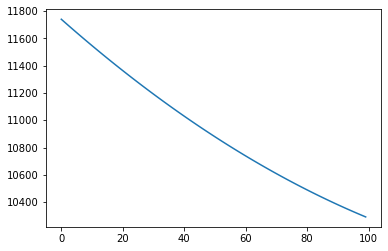

In [8]:
### Plot the error over time

plt.plot(all_steps, all_errors)
plt.show()

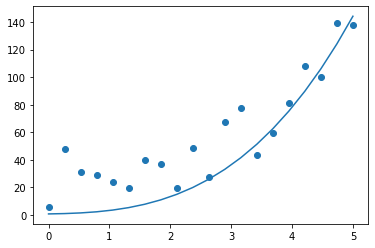

In [9]:
### Let's also compare the original data with the fit.

y_fit = [weights[0] + weights[1]*x_data[i] + weights[2]*x_data[i]**2 + weights[3]*x_data[i]**3 for i in range(len(x_data))]

plt.scatter(x_data, y_data)
plt.plot(x_data, y_fit)
plt.show()

Clearly the model didn't train very well because the error is still high. Let's try again with a bigger learn rate.

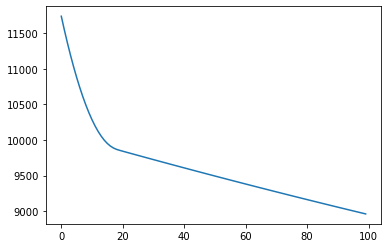

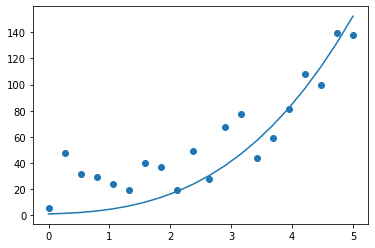

In [10]:
### Try again with a bigger learn rate.

weights = copy.deepcopy(initial_weights)

all_steps = []
all_errors = []
lr = 0.01
for step in range(100):
    # Compute the error
    error = sum([ComputeError(weights, x_data[i], y_data[i]) for i in range(len(x_data))])
    
    # Store the values
    all_steps.append(step)
    all_errors.append(error)
    
    # Compute the combined gradient
    gradient = sum([ComputeGradient(weights, x_data[i], y_data[i]) for i in range(len(x_data))])
    
    # Normalize the gradient to be the size of the learn rate
    gradient *= lr/np.sqrt(sum([g**2 for g in gradient]))
    
    # Create the new weights
    weights -= gradient

# Show the error
plt.plot(all_steps, all_errors)
plt.show()

# Show the model
y_fit = [weights[0] + weights[1]*x_data[i] + weights[2]*x_data[i]**2 + weights[3]*x_data[i]**3 for i in range(len(x_data))]

plt.scatter(x_data, y_data)
plt.plot(x_data, y_fit)
plt.show()

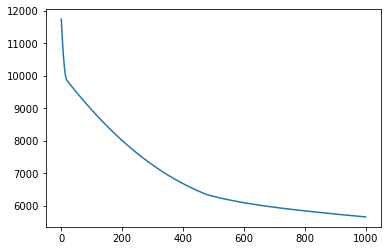

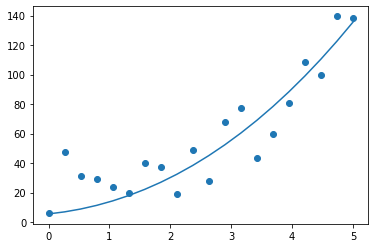

In [11]:
### This looks better, but let's try training it for 1000 steps instead of 100.

weights = copy.deepcopy(initial_weights)

all_steps = []
all_errors = []
lr = 0.01
for step in range(1000):
    # Compute the error
    error = sum([ComputeError(weights, x_data[i], y_data[i]) for i in range(len(x_data))])
    
    # Store the values
    all_steps.append(step)
    all_errors.append(error)
    
    # Compute the combined gradient
    gradient = sum([ComputeGradient(weights, x_data[i], y_data[i]) for i in range(len(x_data))])
    
    # Normalize the gradient to be the size of the learn rate
    gradient *= lr/np.sqrt(sum([g**2 for g in gradient]))
    
    # Create the new weights
    weights -= gradient
    
# Show the error
plt.plot(all_steps, all_errors)
plt.show()

# Show the model
y_fit = [weights[0] + weights[1]*x_data[i] + weights[2]*x_data[i]**2 + weights[3]*x_data[i]**3 for i in range(len(x_data))]

plt.scatter(x_data, y_data)
plt.plot(x_data, y_fit)
plt.show()

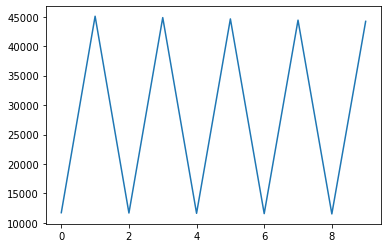

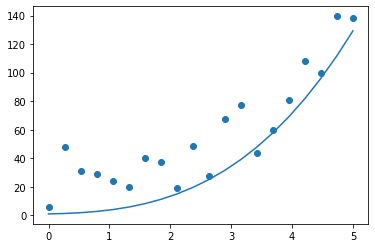

In [12]:
### As a final test, let's try this with a large learn rate for only a few steps.

weights = copy.deepcopy(initial_weights)

all_steps = []
all_errors = []
lr = 1
for step in range(10):
    # Compute the error
    error = sum([ComputeError(weights, x_data[i], y_data[i]) for i in range(len(x_data))])
    
    # Store the values
    all_steps.append(step)
    all_errors.append(error)
    
    # Compute the combined gradient
    gradient = sum([ComputeGradient(weights, x_data[i], y_data[i]) for i in range(len(x_data))])
    
    # Normalize the gradient to be the size of the learn rate
    gradient *= lr/np.sqrt(sum([g**2 for g in gradient]))
    
    # Create the new weights
    weights -= gradient

# Show the error
plt.plot(all_steps, all_errors)
plt.show()

# Show the model
y_fit = [weights[0] + weights[1]*x_data[i] + weights[2]*x_data[i]**2 + weights[3]*x_data[i]**3 for i in range(len(x_data))]

plt.scatter(x_data, y_data)
plt.plot(x_data, y_fit)
plt.show()

What's happening with this last error graph? The idea is that the learn rate is too large and the model keeps missing the optimal value.

This demonstrates that, in gradient descent, there is a trade-off between efficiency and stability. Keep this in mind in your own code moving forward.